In [117]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from pandas import read_excel
import numpy as np
import math
import matplotlib.pyplot as plt
import os

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
import xgboost
from pandas import MultiIndex
#from pandas import Int64Index
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning
### Read data from file

In [118]:
data = pd.read_excel('../data/dataset_final.xlsx', sheet_name = 'Dataset_Complete_modified')
#data

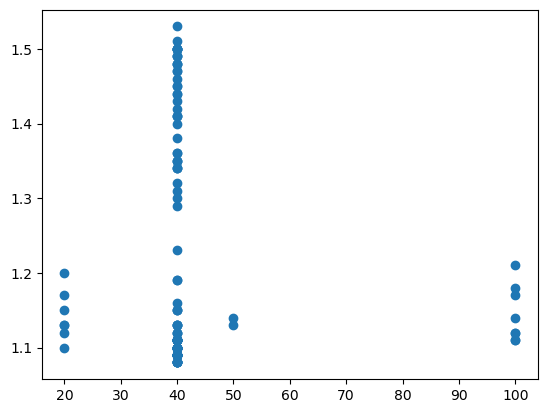

In [119]:
plt.scatter(data['dpn'], data['Dispersity'])

### Dropping some of the features from the original dataset

In [120]:
data = data.drop(columns=['composition_C','Polymer Index','Dispersity','clogP','block_sequence_theoretical', 'block_sequence_experimental','MIC_PAO1', 'MIC_PA','MIC_EC', 'MIC_AB', 'MIC_SA', 'MIC_MSmeg','GPC','Target','NMR'])
data = data.replace({'>128':128,'>256':256, '32-64':64, '64-128':128,'128-256':256})

### Assign Classes based on MIC Values

In [121]:
data['MIC_Category'] = data['MIC_PAO1_PA'].apply(lambda x: 1 if x <= 64 else 0)
data = data.drop(columns = ['MIC_PAO1_PA'])

### Creating dummy variables for monomer types

In [122]:
data_with_dummies = pd.get_dummies(data, drop_first=True)
#data_with_dummies

### Spliting the target variable (MIC_Category) and rest of the data.

In [123]:
Y = data_with_dummies['MIC_Category']
Y = Y.reset_index()
Y = Y.drop(columns = ['index'])
#Y = pd.DataFrame(Y)
X = data_with_dummies.drop(columns = ['MIC_Category'])

In [124]:
Y.value_counts()

MIC_Category
0               130
1                27
dtype: int64

## Standardization of the whole data

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns, index = X.index.values.tolist())

In [126]:
from sklearn.manifold import TSNE
X_numpy=X_scaled.to_numpy()



In [127]:
X_numpy

array([[-0.09938649,  0.73523312, -0.72055904, ...,  0.24659848,
        -0.18136906, -0.11359237],
       [-0.09938649,  0.73523312, -0.72055904, ...,  0.24659848,
        -0.18136906, -0.11359237],
       [-0.09938649,  0.73523312, -0.72055904, ...,  0.24659848,
        -0.18136906, -0.11359237],
       ...,
       [-1.34768084,  1.8093093 ,  0.72737568, ...,  0.24659848,
        -0.18136906, -0.11359237],
       [-1.34768084,  0.29296645,  2.23826409, ...,  0.24659848,
        -0.18136906, -0.11359237],
       [-1.34768084, -1.16019544,  3.68619882, ...,  0.24659848,
        -0.18136906, -0.11359237]])

### Performing train test split

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=0, stratify = Y) 

In [129]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

In [130]:
data

,type_A,type_B1,type_B2,type_C,composition_A,composition_B1,composition_B2,Number of blocks,dpn,A1,B1,C1,A2,B2,C2,A3,B3,C3,A4,B4,C4,cLogP_predicted,MIC_Category
0,Boc-AEAm,PEAm,None,HEAm,0.5,0.30,0.00,1,100,0.3330,0.3330,0.334,0.0,0.00,0.000,0.00,0.00,0.0,0,0.00,0.0,0.67630,1
1,Boc-AEAm,PEAm,None,HEAm,0.5,0.30,0.00,1,40,0.3325,0.3325,0.335,0.0,0.00,0.000,0.00,0.00,0.0,0,0.00,0.0,0.67630,1
2,Boc-AEAm,PEAm,None,HEAm,0.5,0.30,0.00,1,20,0.3300,0.3350,0.335,0.0,0.00,0.000,0.00,0.00,0.0,0,0.00,0.0,0.67630,1
3,Boc-AEAm,PEAm,None,None,0.7,0.30,0.00,1,100,0.5000,0.5000,0.000,0.0,0.00,0.000,0.00,0.00,0.0,0,0.00,0.0,1.05270,0
4,Boc-AEAm,PEAm,None,None,0.7,0.30,0.00,1,40,0.5000,0.5000,0.000,0.0,0.00,0.000,0.00,0.00,0.0,0,0.00,0.0,1.05270,1
5,Boc-AEAm,PEAm,None,None,0.7,0.30,0.00,1,20,0.5000,0.5000,0.000,0.0,0.00,0.000,0.00,0.00,0.0,0,0.00,0.0,1.05270,0
6,Boc-AEAm,PEAm,None,HEAm,0.5,0.30,0.00,2,100,0.5000,0.0000,0.200,0.0,0.30,0.000,0.00,0.00,0.0,0,0.00,0.0,0.67630,0
7,Boc-AEAm,PEAm,None,HEAm,0.5,0.30,0.00,2,40,0.5000,0.0000,0.200,0.0,0.30,0.000,0.00,0.00,0.0,0,0.00,0.0,0.67630,0
8,Boc-AEAm,PEAm,None,HEAm,0.5,0.30,0.00,2,20,0.5000,0.0000,0.200,0.0,0.30,0.000,0.00,0.00,0.0,0,0.00,0.0,0.67630,0
9,Boc-AEAm,PEAm,None,HEAm,0.5,0.30,0.00,3,100,0.2500,0.0000,0.100,0.0,0.30,0.000,0.25,0.00,0.1,0,0.00,0.0,0.67630,0


In [131]:
X

,composition_A,composition_B1,composition_B2,Number of blocks,dpn,A1,B1,C1,A2,B2,C2,A3,B3,C3,A4,B4,C4,cLogP_predicted,type_A_Boc-AEAm,type_A_DMAEA,type_B1_PEAm,type_B2_None,type_C_HEAm,type_C_None,type_C_PEGA
0,0.5,0.30,0.00,1,100,0.3330,0.3330,0.334,0.0,0.00,0.000,0.00,0.00,0.0,0,0.00,0.0,0.67630,1,0,1,1,1,0,0
1,0.5,0.30,0.00,1,40,0.3325,0.3325,0.335,0.0,0.00,0.000,0.00,0.00,0.0,0,0.00,0.0,0.67630,1,0,1,1,1,0,0
2,0.5,0.30,0.00,1,20,0.3300,0.3350,0.335,0.0,0.00,0.000,0.00,0.00,0.0,0,0.00,0.0,0.67630,1,0,1,1,1,0,0
3,0.7,0.30,0.00,1,100,0.5000,0.5000,0.000,0.0,0.00,0.000,0.00,0.00,0.0,0,0.00,0.0,1.05270,1,0,1,1,0,1,0
4,0.7,0.30,0.00,1,40,0.5000,0.5000,0.000,0.0,0.00,0.000,0.00,0.00,0.0,0,0.00,0.0,1.05270,1,0,1,1,0,1,0
5,0.7,0.30,0.00,1,20,0.5000,0.5000,0.000,0.0,0.00,0.000,0.00,0.00,0.0,0,0.00,0.0,1.05270,1,0,1,1,0,1,0
6,0.5,0.30,0.00,2,100,0.5000,0.0000,0.200,0.0,0.30,0.000,0.00,0.00,0.0,0,0.00,0.0,0.67630,1,0,1,1,1,0,0
7,0.5,0.30,0.00,2,40,0.5000,0.0000,0.200,0.0,0.30,0.000,0.00,0.00,0.0,0,0.00,0.0,0.67630,1,0,1,1,1,0,0
8,0.5,0.30,0.00,2,20,0.5000,0.0000,0.200,0.0,0.30,0.000,0.00,0.00,0.0,0,0.00,0.0,0.67630,1,0,1,1,1,0,0
9,0.5,0.30,0.00,3,100,0.2500,0.0000,0.100,0.0,0.30,0.000,0.25,0.00,0.1,0,0.00,0.0,0.67630,1,0,1,1,1,0,0


# Model training   

## Random Forest Classifier

In [132]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

rf = RandomForestClassifier(random_state=0,n_estimators = 200,
 min_samples_split = 10,
 min_samples_leaf = 4,
 max_features = 'log2',
 max_depth = None,
 class_weight = 'balanced',
 bootstrap = True)

rf.fit(X_train,Y_train.values.ravel())
Y_rf = rf.predict(X_test)
confusion_matrix(Y_test,Y_rf)


array([[23,  3],
       [ 1,  5]])

In [133]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_rf, target_names = target_names))

              precision    recall  f1-score   support

         bad       0.96      0.88      0.92        26
        good       0.62      0.83      0.71         6

    accuracy                           0.88        32
   macro avg       0.79      0.86      0.82        32
weighted avg       0.90      0.88      0.88        32



In [134]:
cm_rf = confusion_matrix(Y_test, Y_rf)

TN, FP, FN, TP = cm_rf.ravel()
print("True Positive: ", TP)
print("True Negative: ", TN)
print("False Positive: ", FP)
print("False Negative: ", FN)

True Positive:  5
True Negative:  23
False Positive:  3
False Negative:  1


Random Forest PR AUC: 0.65


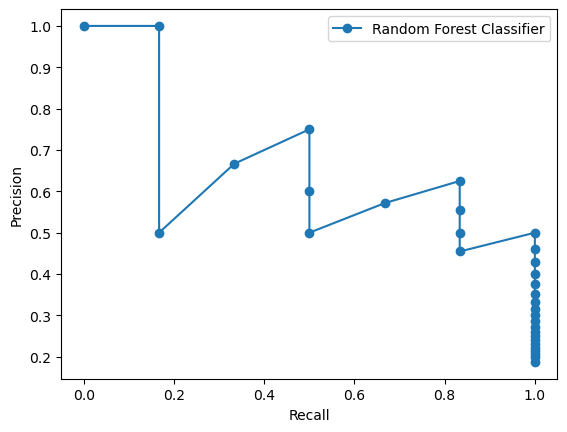

In [135]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot

def plot_pr_curve(Y_test, model_probs):
 precision, recall, _ = precision_recall_curve(Y_test, model_probs)
 pyplot.plot(recall, precision, marker='o', label='Random Forest Classifier')
 # axis labels
 pyplot.xlabel('Recall')
 pyplot.ylabel('Precision')
 # show the legend
 pyplot.legend()
 # show the plot
 pyplot.show()

yhat = rf.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(Y_test, model_probs)
auc_score = auc(recall, precision)
print('Random Forest PR AUC: %.2f' % auc_score)
# plot precision-recall curves
plot_pr_curve(Y_test, model_probs)

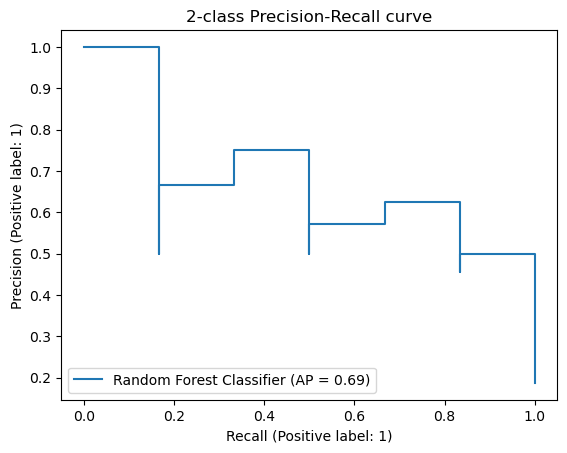

In [136]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(rf, X_test, Y_test, name="Random Forest Classifier")
_ = display.ax_.set_title("2-class Precision-Recall curve")

## Logistic Regression Classifier

In [137]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr = LogisticRegression(random_state = 0, max_iter= 1000, class_weight= 'balanced', C= 1.0)
lr.fit(X_train,Y_train.values.ravel())
Y_lr = lr.predict(X_test)
confusion_matrix(Y_test,Y_lr)




array([[24,  2],
       [ 1,  5]])

In [138]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_lr, target_names = target_names))

              precision    recall  f1-score   support

         bad       0.96      0.92      0.94        26
        good       0.71      0.83      0.77         6

    accuracy                           0.91        32
   macro avg       0.84      0.88      0.86        32
weighted avg       0.91      0.91      0.91        32



Logistic Regression PR AUC: 0.67


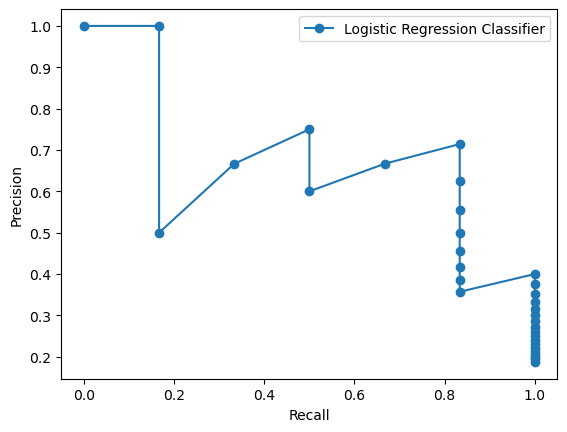

In [139]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot

def plot_pr_curve(Y_test, model_probs):
 precision, recall, _ = precision_recall_curve(Y_test, model_probs)
 pyplot.plot(recall, precision, marker='o', label='Logistic Regression Classifier')
 # axis labels
 pyplot.xlabel('Recall')
 pyplot.ylabel('Precision')
 # show the legend
 pyplot.legend()
 # show the plot
 pyplot.show()

yhat = lr.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(Y_test, model_probs)
auc_score = auc(recall, precision)
print('Logistic Regression PR AUC: %.2f' % auc_score)
# plot precision-recall curves
plot_pr_curve(Y_test, model_probs)

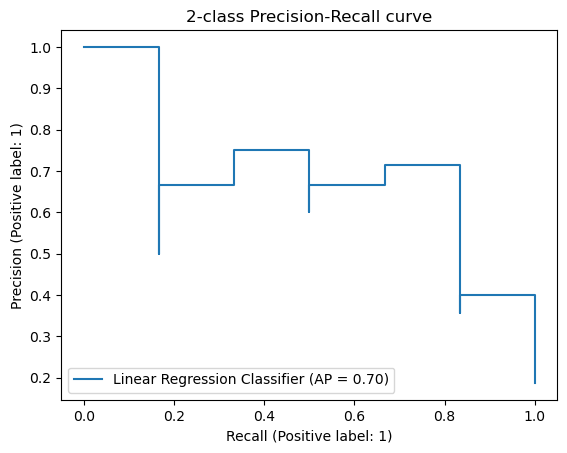

In [140]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(lr, X_test, Y_test, name="Linear Regression Classifier")
_ = display.ax_.set_title("2-class Precision-Recall curve")

## SVC

In [141]:
from sklearn.svm import SVC
svc=SVC()

svc = SVC(kernel= 'sigmoid', gamma= 0.1, class_weight= 'balanced', C = 0.01, random_state = 0, probability=True)
svc.fit(X_train,Y_train.values.ravel())
Y_svc = svc.predict(X_test)
confusion_matrix(Y_test,Y_svc)

array([[ 0, 26],
       [ 0,  6]])

In [142]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_lr, target_names = target_names))

              precision    recall  f1-score   support

         bad       0.96      0.92      0.94        26
        good       0.71      0.83      0.77         6

    accuracy                           0.91        32
   macro avg       0.84      0.88      0.86        32
weighted avg       0.91      0.91      0.91        32



SVC PR AUC: 0.49


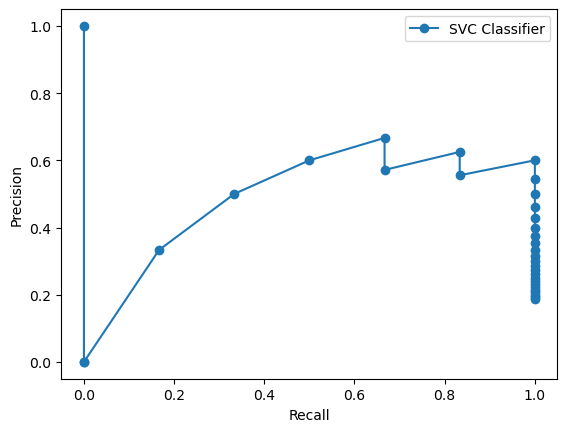

In [143]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot

def plot_pr_curve(Y_test, model_probs):
 precision, recall, _ = precision_recall_curve(Y_test, model_probs)
 pyplot.plot(recall, precision, marker='o', label='SVC Classifier')
 # axis labels
 pyplot.xlabel('Recall')
 pyplot.ylabel('Precision')
 # show the legend
 pyplot.legend()
 # show the plot
 pyplot.show()

yhat = svc.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(Y_test, model_probs)
auc_score = auc(recall, precision)
print('SVC PR AUC: %.2f' % auc_score)
# plot precision-recall curves
plot_pr_curve(Y_test, model_probs)

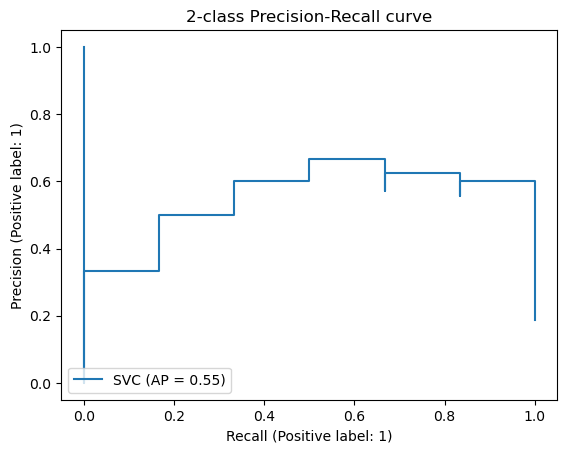

In [144]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(svc, X_test, Y_test, name="SVC")
_ = display.ax_.set_title("2-class Precision-Recall curve")

## XG Boost Classifier

import os
from xgboost import XGBClassifier

os.environ['KMP_DUPLICATE_LIB_OK']='True'
xgb=XGBClassifier()

xgb = XGBClassifier(random_state = 0, subsample = 0.5,
 scale_pos_weight= 5.0,
 n_estimators= 100,
 max_depth= 15,
 learning_rate= 0.01,
 colsample_bytree= 0.7999999999999999,
 colsample_bylevel= 0.5)

xgb.fit(X_train,Y_train.values.ravel())
Y_xgb = xgb.predict(X_test)
confusion_matrix(Y_test,Y_xgb)

target_names = ['bad','good']
print(classification_report(Y_test, Y_xgb, target_names = target_names))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot

def plot_pr_curve(Y_test, model_probs):
 precision, recall, _ = precision_recall_curve(Y_test, model_probs)
 pyplot.plot(recall, precision, marker='o', label='XG Boost')
 # axis labels
 pyplot.xlabel('Recall')
 pyplot.ylabel('Precision')
 # show the legend
 pyplot.legend()
 # show the plot
 pyplot.show()

yhat =xgb.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(Y_test, model_probs)
auc_score = auc(recall, precision)
print('XG Boost PR AUC: %.2f' % auc_score)
# plot precision-recall curves
plot_pr_curve(Y_test, model_probs)

## Neural Network Classifier

In [145]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier()

ann = MLPClassifier(random_state= 0,solver = 'lbfgs',
 max_iter= 3000,
 learning_rate= 'adaptive',
 hidden_layer_sizes= (10,),
 alpha= 0.05,
 activation= 'logistic')

ann.fit(X_train,Y_train.values.ravel())
Y_ann = ann.predict(X_test)
confusion_matrix(Y_test,Y_ann)

array([[25,  1],
       [ 2,  4]])

In [146]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_ann, target_names = target_names))

              precision    recall  f1-score   support

         bad       0.93      0.96      0.94        26
        good       0.80      0.67      0.73         6

    accuracy                           0.91        32
   macro avg       0.86      0.81      0.84        32
weighted avg       0.90      0.91      0.90        32



Neural Network Classifier PR AUC: 0.82


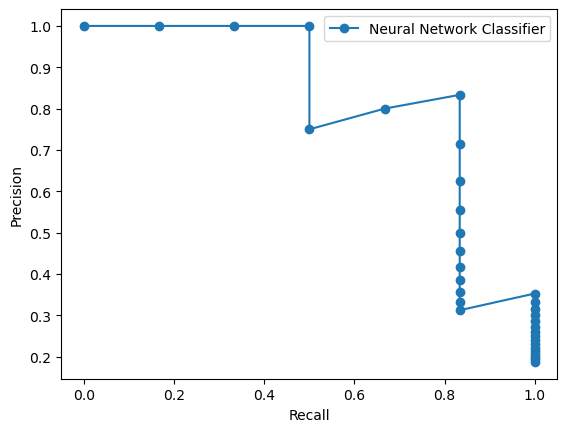

In [147]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot

def plot_pr_curve(Y_test, model_probs):
 precision, recall, _ = precision_recall_curve(Y_test, model_probs)
 pyplot.plot(recall, precision, marker='o', label='Neural Network Classifier')
 # axis labels
 pyplot.xlabel('Recall')
 pyplot.ylabel('Precision')
 # show the legend
 pyplot.legend()
 # show the plot
 pyplot.show()

yhat = ann.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(Y_test, model_probs)
auc_score = auc(recall, precision)
print('Neural Network Classifier PR AUC: %.2f' % auc_score)
# plot precision-recall curves
plot_pr_curve(Y_test, model_probs)

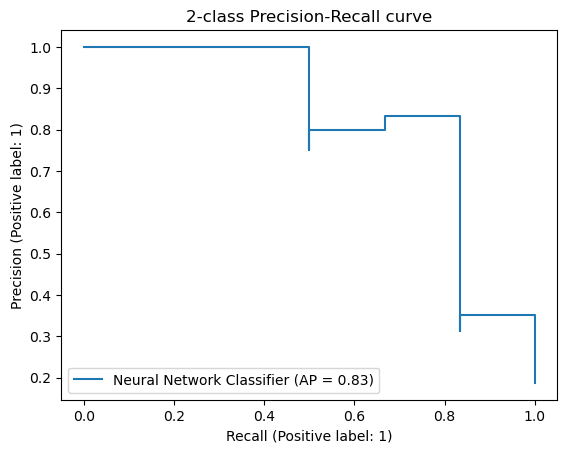

In [148]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(ann, X_test, Y_test, name="Neural Network Classifier")
_ = display.ax_.set_title("2-class Precision-Recall curve")

## Decision Tree Classifier

In [149]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc = DecisionTreeClassifier(random_state=0, splitter= 'best',
 min_samples_leaf= 5,
 max_features= 'log2',
 max_depth= 20,
 criterion= 'entropy',
 class_weight= 'balanced')

dtc.fit(X_train,Y_train.values.ravel())
Y_dtc = dtc.predict(X_test)
confusion_matrix(Y_test,Y_dtc)

array([[23,  3],
       [ 0,  6]])

In [150]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_dtc, target_names = target_names))

              precision    recall  f1-score   support

         bad       1.00      0.88      0.94        26
        good       0.67      1.00      0.80         6

    accuracy                           0.91        32
   macro avg       0.83      0.94      0.87        32
weighted avg       0.94      0.91      0.91        32



In [151]:
cm_dtc = confusion_matrix(Y_test, Y_rf)

TN, FP, FN, TP = cm_dtc.ravel()
print("True Positive: ", TP)
print("True Negative: ", TN)
print("False Positive: ", FP)
print("False Negative: ", FN)

True Positive:  5
True Negative:  23
False Positive:  3
False Negative:  1


Decision Tree Classifier PR AUC: 0.87


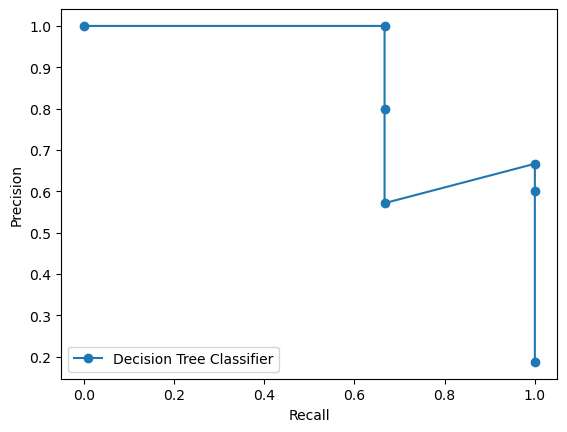

In [152]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot

def plot_pr_curve(Y_test, model_probs):
 precision, recall, _ = precision_recall_curve(Y_test, model_probs)
 pyplot.plot(recall, precision, marker='o', label='Decision Tree Classifier')
 # axis labels
 pyplot.xlabel('Recall')
 pyplot.ylabel('Precision')
 # show the legend
 pyplot.legend()
 # show the plot
 pyplot.show()

yhat = dtc.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(Y_test, model_probs)
auc_score = auc(recall, precision)
print('Decision Tree Classifier PR AUC: %.2f' % auc_score)
# plot precision-recall curves
plot_pr_curve(Y_test, model_probs)

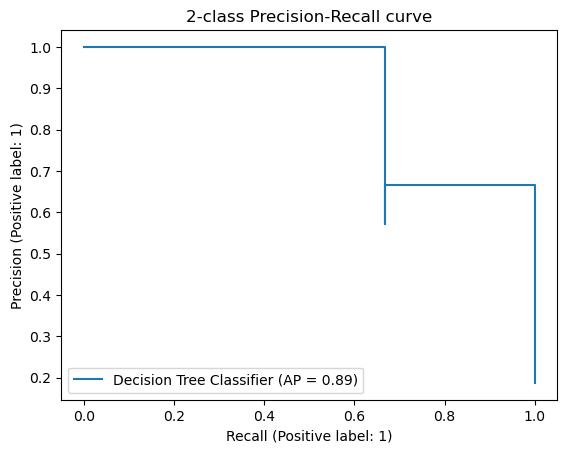

In [153]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(dtc, X_test, Y_test, name="Decision Tree Classifier")
_ = display.ax_.set_title("2-class Precision-Recall curve")

## Ada-boost Classifier 

In [154]:
from sklearn.tree import DecisionTreeClassifier
ada = AdaBoostClassifier()

ada = AdaBoostClassifier(random_state=0, n_estimators = 10, learning_rate = 2.5, algorithm = 'SAMME.R')
ada.fit(X_train,Y_train.values.ravel())
Y_ada = ada.predict(X_test)
confusion_matrix(Y_test,Y_ada)

array([[ 2, 24],
       [ 0,  6]])

In [155]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_ada, target_names = target_names))

              precision    recall  f1-score   support

         bad       1.00      0.08      0.14        26
        good       0.20      1.00      0.33         6

    accuracy                           0.25        32
   macro avg       0.60      0.54      0.24        32
weighted avg       0.85      0.25      0.18        32



Ada Boost Classifier PR AUC: 0.73


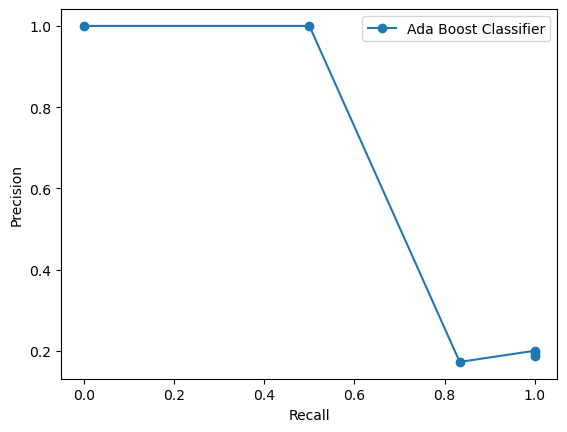

In [156]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot

def plot_pr_curve(Y_test, model_probs):
 precision, recall, _ = precision_recall_curve(Y_test, model_probs)
 pyplot.plot(recall, precision, marker='o', label='Ada Boost Classifier')
 # axis labels
 pyplot.xlabel('Recall')
 pyplot.ylabel('Precision')
 # show the legend
 pyplot.legend()
 # show the plot
 pyplot.show()

yhat = ada.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(Y_test, model_probs)
auc_score = auc(recall, precision)
print('Ada Boost Classifier PR AUC: %.2f' % auc_score)
# plot precision-recall curves
plot_pr_curve(Y_test, model_probs)

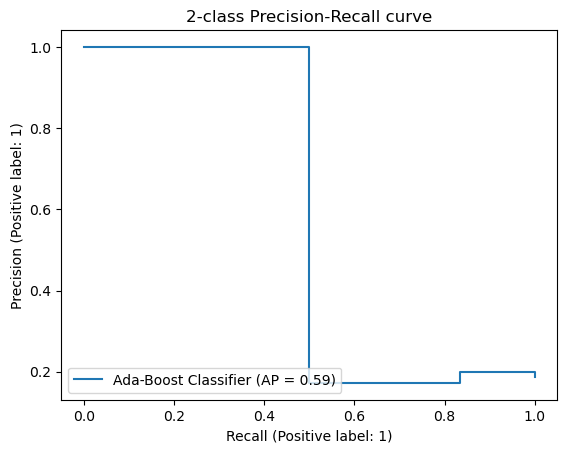

In [157]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(ada, X_test, Y_test, name="Ada-Boost Classifier")
_ = display.ax_.set_title("2-class Precision-Recall curve")

## Naive Bayes Classifier

In [158]:
gnb = GaussianNB()
gnb = GaussianNB(var_smoothing =  1.519911082952933e-08)

gnb.fit(X_train,Y_train.values.ravel())
Y_gnb = gnb.predict(X_test)
confusion_matrix(Y_test,Y_gnb)

array([[24,  2],
       [ 3,  3]])

In [159]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_gnb, target_names = target_names))

              precision    recall  f1-score   support

         bad       0.89      0.92      0.91        26
        good       0.60      0.50      0.55         6

    accuracy                           0.84        32
   macro avg       0.74      0.71      0.73        32
weighted avg       0.83      0.84      0.84        32



Naive Bayes Classifier PR AUC: 0.52


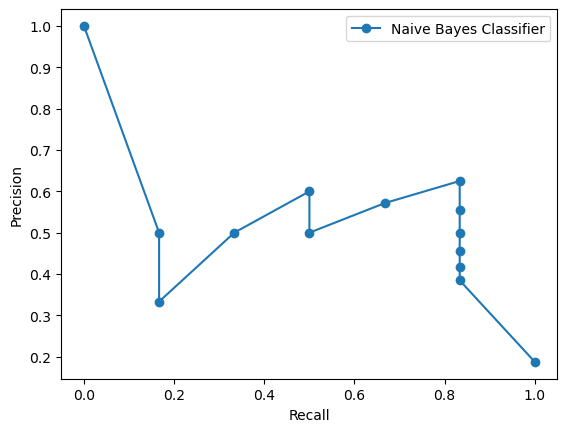

In [160]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot

def plot_pr_curve(Y_test, model_probs):
 precision, recall, _ = precision_recall_curve(Y_test, model_probs)
 pyplot.plot(recall, precision, marker='o', label='Naive Bayes Classifier')
 # axis labels
 pyplot.xlabel('Recall')
 pyplot.ylabel('Precision')
 # show the legend
 pyplot.legend()
 # show the plot
 pyplot.show()

yhat = gnb.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(Y_test, model_probs)
auc_score = auc(recall, precision)
print('Naive Bayes Classifier PR AUC: %.2f' % auc_score)
# plot precision-recall curves
plot_pr_curve(Y_test, model_probs)

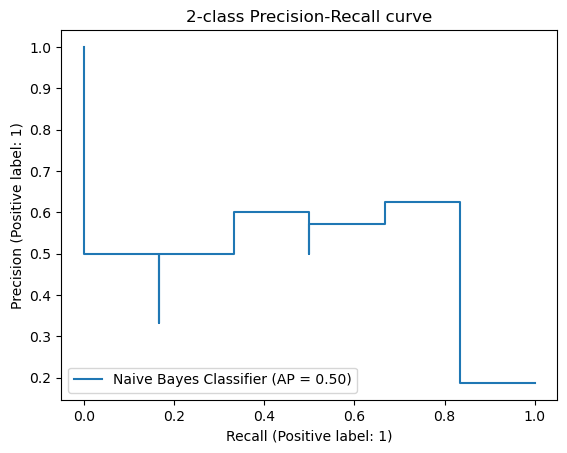

In [161]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(gnb, X_test, Y_test, name="Naive Bayes Classifier")
_ = display.ax_.set_title("2-class Precision-Recall curve")

## kNN Classifier

In [162]:
knn = KNeighborsClassifier()
knn = KNeighborsClassifier(weights = 'uniform',
 p= 2,
 n_neighbors= 1,
 leaf_size = 36,
 algorithm = 'kd_tree')

knn.fit(X_train,Y_train.values.ravel())
Y_knn = knn.predict(X_test)
confusion_matrix(Y_test,Y_knn)

array([[25,  1],
       [ 2,  4]])

In [163]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_knn, target_names = target_names))

              precision    recall  f1-score   support

         bad       0.93      0.96      0.94        26
        good       0.80      0.67      0.73         6

    accuracy                           0.91        32
   macro avg       0.86      0.81      0.84        32
weighted avg       0.90      0.91      0.90        32



kNN Classifier PR AUC: 0.76


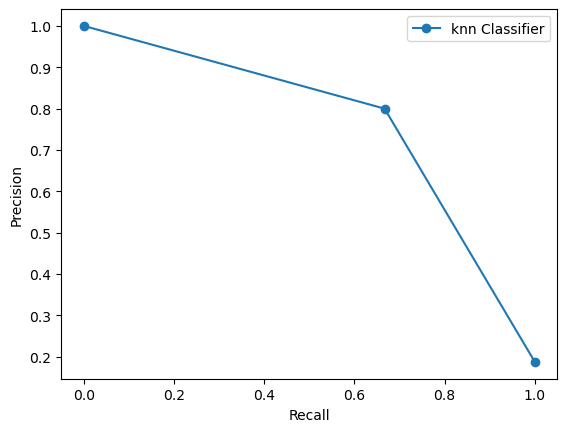

In [164]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot

def plot_pr_curve(Y_test, model_probs):
 precision, recall, _ = precision_recall_curve(Y_test, model_probs)
 pyplot.plot(recall, precision, marker='o', label='knn Classifier')
 # axis labels
 pyplot.xlabel('Recall')
 pyplot.ylabel('Precision')
 # show the legend
 pyplot.legend()
 # show the plot
 pyplot.show()

yhat = knn.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(Y_test, model_probs)
auc_score = auc(recall, precision)
print('kNN Classifier PR AUC: %.2f' % auc_score)
# plot precision-recall curves
plot_pr_curve(Y_test, model_probs)

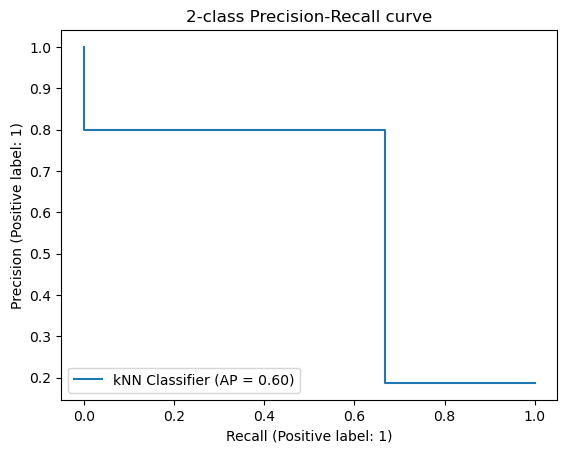

In [165]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(knn, X_test, Y_test, name="kNN Classifier")
_ = display.ax_.set_title("2-class Precision-Recall curve")

## SHAP Analysis

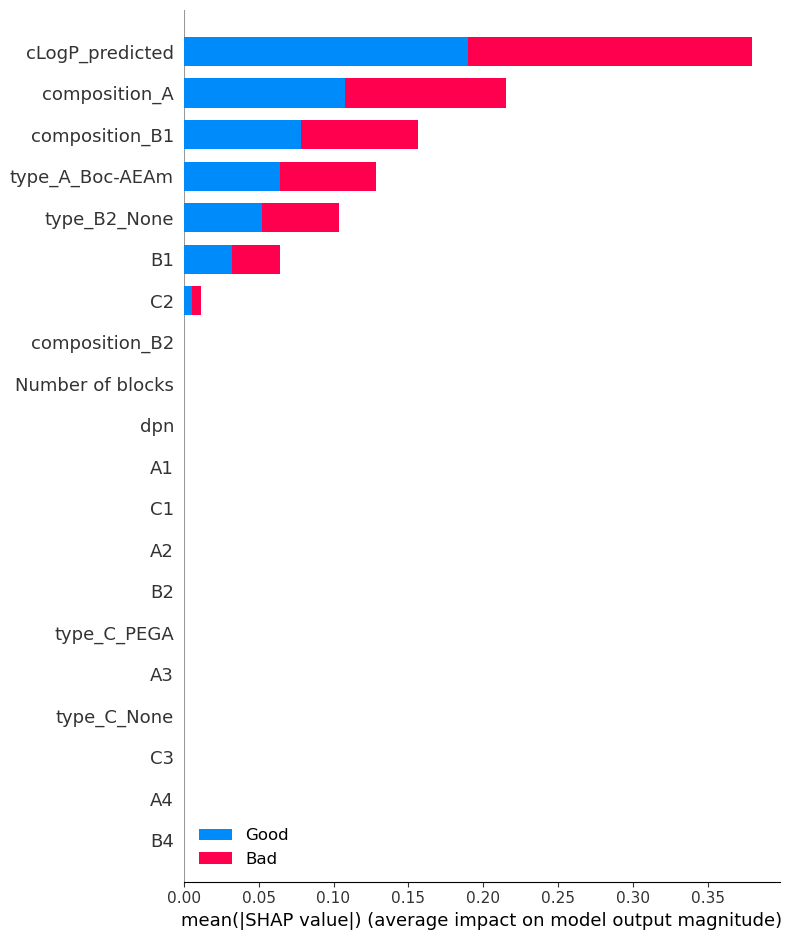

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


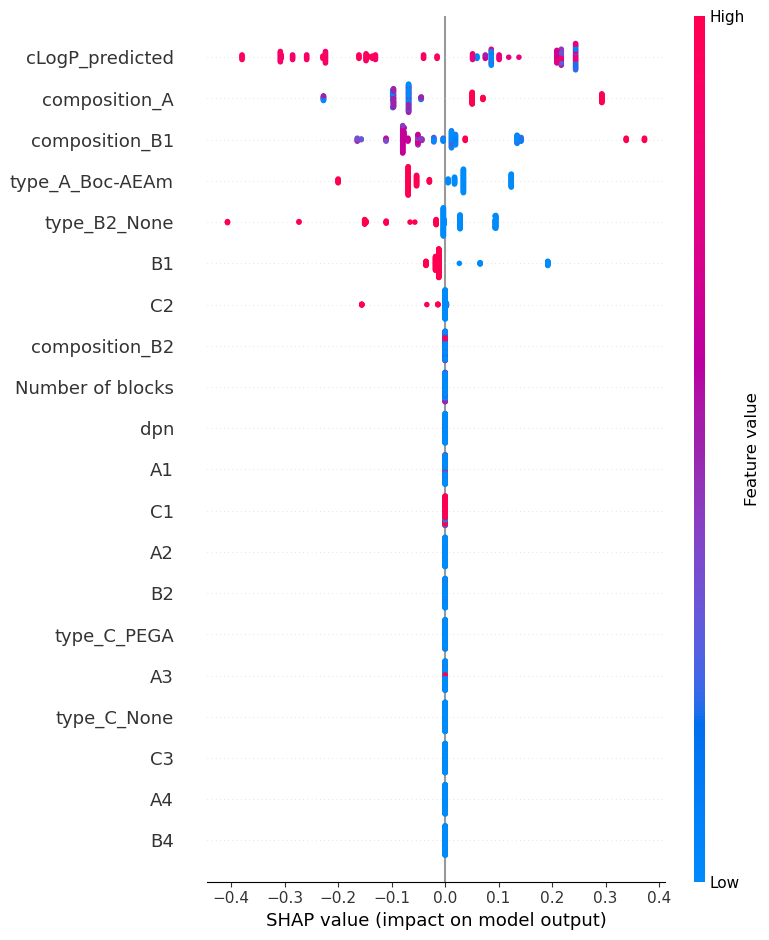

In [166]:
import shap
shap.initjs()
class_names = ['Bad','Good']
explainer = shap.TreeExplainer(dtc,X_scaled)
shap_values = explainer.shap_values(X_scaled)

shap.summary_plot(shap_values, X, class_names= class_names)
shap.summary_plot(shap_values[0], X.values, feature_names = X.columns)



In [167]:
shap_values

[array([[-0.09662665, -0.07931133,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.09662665, -0.07931133,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.09662665, -0.07931133,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.04534019,  0.03757053,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.06838193, -0.05088001,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.06838193,  0.01181501,  0.        , ...,  0.        ,
          0.        ,  0.        ]]),
 array([[ 0.09662665,  0.07931134,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.09662665,  0.07931134,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.09662665,  0.07931134,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.0453402 , -0.03757053,  0.        , ...,  

shap.initjs()
shap.dependence_plot('cLogP_predicted', shap_values[0], X, interaction_index=None)
shap.dependence_plot('composition_A', shap_values[0], X, interaction_index=None)
shap.dependence_plot('composition_B1', shap_values[0], X, interaction_index=None)
shap.dependence_plot('type_A_Boc-AEAm', shap_values[0], X, interaction_index=None)
shap.dependence_plot('type_B2_None', shap_values[0], X, interaction_index=None)
shap.dependence_plot('B1', shap_values[0], X, interaction_index=None)
shap.dependence_plot('C2', shap_values[0], X, interaction_index=None)


shap.initjs()
shap_values = explainer.shap_values(X_test.iloc[0,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0,:])

In [168]:
shap_values

[array([[-0.09662665, -0.07931133,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.09662665, -0.07931133,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.09662665, -0.07931133,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.04534019,  0.03757053,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.06838193, -0.05088001,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.06838193,  0.01181501,  0.        , ...,  0.        ,
          0.        ,  0.        ]]),
 array([[ 0.09662665,  0.07931134,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.09662665,  0.07931134,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.09662665,  0.07931134,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.0453402 , -0.03757053,  0.        , ...,  

In [169]:
shap_values_df = pd.DataFrame(data=shap_values[0], columns=X.columns)

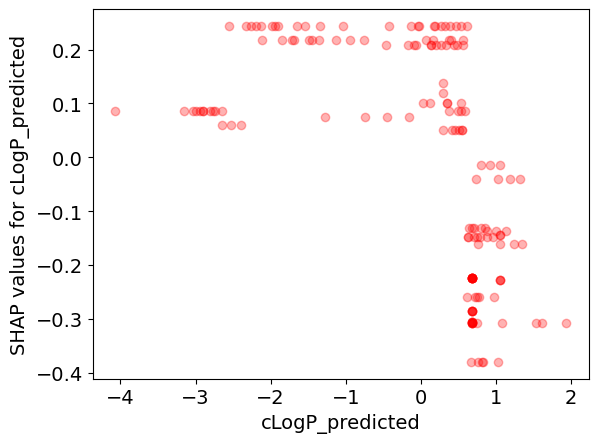

In [170]:
fig, ax = plt.subplots()
ax.scatter(X['cLogP_predicted'], shap_values_df['cLogP_predicted'],color = 'red', alpha = 0.3)
#ax.set_title('Scatter plot')
ax.set_xlabel('cLogP_predicted',fontsize=14)
ax.set_ylabel('SHAP values for cLogP_predicted', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.subplots_adjust(left=0.15)
plt.savefig('scatter_plot_cLogP_predicted.png', dpi=300,transparent=True, bbox_inches='tight', pad_inches=0.1)



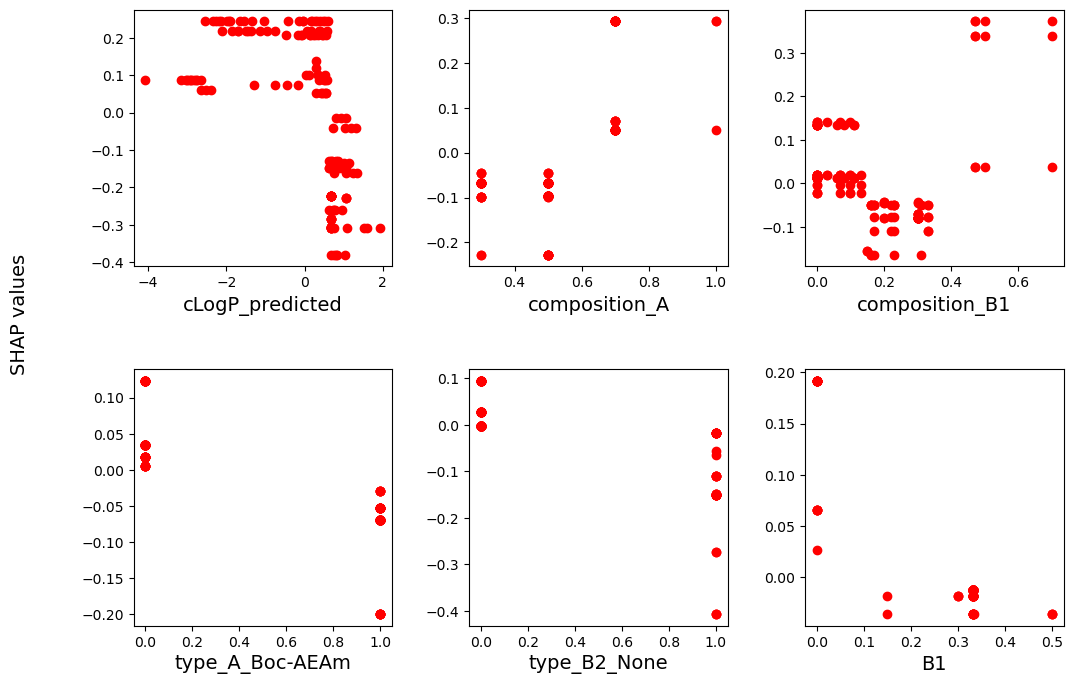

In [171]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# plot on each of the subplots
axes[0, 0].scatter(X['cLogP_predicted'], shap_values_df['cLogP_predicted'],color = 'red')
axes[0, 0].set_xlabel('cLogP_predicted',fontsize=14)
#axes[0, 0].set_ylabel('SHAP values for cLogP_predicted', fontsize=14)
#axes[0, 0].set_title('cLogP_predicted')

axes[0, 1].scatter(X['composition_A'], shap_values_df['composition_A'],color = 'red')
axes[0, 1].set_xlabel('composition_A',fontsize=14)
#axes[0, 1].set_ylabel('SHAP values for composition_A', fontsize=14)
#axes[0, 1].set_title('composition_A')

axes[0, 2].scatter(X['composition_B1'], shap_values_df['composition_B1'],color = 'red')
axes[0, 2].set_xlabel('composition_B1',fontsize=14)
#axes[0, 2].set_ylabel('SHAP values for cLogP_predicted', fontsize=14)
#axes[0, 2].set_title('composition_B1')

axes[1, 0].scatter(X['type_A_Boc-AEAm'], shap_values_df['type_A_Boc-AEAm'],color = 'red')
axes[1, 0].set_xlabel('type_A_Boc-AEAm',fontsize=14)
#axes[1, 0].set_ylabel('SHAP values for cLogP_predicted', fontsize=14)
#axes[1, 0].set_title('type_A_Boc-AEAm')

axes[1, 1].scatter(X['type_B2_None'], shap_values_df['type_B2_None'],color = 'red')
axes[1, 1].set_xlabel('type_B2_None',fontsize=14)
#axes[1, 1].set_ylabel('SHAP values for cLogP_predicted', fontsize=14)
#axes[1, 1].set_title('type_B2_None')

axes[1, 2].scatter(X['B1'], shap_values_df['B1'],color = 'red')
axes[1, 2].set_xlabel('B1',fontsize=14)
#axes[1, 2].set_ylabel('SHAP values for cLogP_predicted', fontsize=14)
#axes[1, 2].set_title('B1')

# set overall title and adjust subplot spacing
#fig.suptitle('Six plots in a 2x3 grid')
plt.subplots_adjust(hspace=0.4, wspace=0.3)
#fig.text(0.5, 0.03, 'feature values', ha='center', va='center', fontsize=14)
fig.text(0.03, 0.5, 'SHAP values', ha='center', va='center', rotation='vertical', fontsize=14)

# Show the plot

# save the figure
fig.savefig('scatter_plots_all.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.5)

In [172]:
Y_dtc

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0])

In [173]:
Y_test

,MIC_Category
59,0
41,0
24,0
31,1
155,0
58,0
144,0
85,0
129,0
142,0


In [174]:
X_test

,composition_A,composition_B1,composition_B2,Number of blocks,dpn,A1,B1,C1,A2,B2,C2,A3,B3,C3,A4,B4,C4,cLogP_predicted,type_A_Boc-AEAm,type_A_DMAEA,type_B1_PEAm,type_B2_None,type_C_HEAm,type_C_None,type_C_PEGA
59,-0.099386,-1.160195,1.356913,-0.382977,-0.163249,-0.184463,0.353758,0.437195,-0.176477,-0.316488,-0.297511,-0.16169,-0.153193,-0.131448,0.0,-0.113592,-0.113592,0.304589,1.019294,-0.584705,0.139573,-0.555278,0.246598,-0.181369,-0.113592
41,1.148908,-0.970653,-0.279883,-0.382977,-0.163249,-0.184463,0.353758,0.437195,-0.176477,-0.316488,-0.297511,-0.16169,-0.153193,-0.131448,0.0,-0.113592,-0.113592,0.398695,1.019294,-0.584705,0.139573,-0.555278,0.246598,-0.181369,-0.113592
24,-0.099386,0.735233,-0.720559,1.334949,-0.163249,1.819636,-2.589431,-1.441870,-0.176477,3.364154,1.062954,-0.16169,-0.153193,-0.131448,0.0,-0.113592,-0.113592,0.572166,1.019294,-0.584705,0.139573,1.800901,0.246598,-0.181369,-0.113592
31,-0.099386,0.735233,-0.720559,-0.382977,-0.163249,-0.184463,0.353758,0.437195,-0.176477,-0.316488,-0.297511,-0.16169,-0.153193,-0.131448,0.0,-0.113592,-0.113592,0.572166,1.019294,-0.584705,0.139573,1.800901,0.246598,-0.181369,-0.113592
155,-1.347681,0.292966,2.238264,-0.382977,-0.163249,-0.184463,0.353758,0.437195,-0.176477,-0.316488,-0.297511,-0.16169,-0.153193,-0.131448,0.0,-0.113592,-0.113592,-0.555616,-0.981071,-0.584705,0.139573,-0.555278,0.246598,-0.181369,-0.113592
58,-0.099386,-0.465205,0.664422,-0.382977,-0.163249,-0.184463,0.353758,0.437195,-0.176477,-0.316488,-0.297511,-0.16169,-0.153193,-0.131448,0.0,-0.113592,-0.113592,0.413824,1.019294,-0.584705,0.139573,-0.555278,0.246598,-0.181369,-0.113592
144,-1.347681,-1.160195,-0.720559,-0.382977,-0.163249,-0.184463,0.353758,0.437195,-0.176477,-0.316488,-0.297511,-0.16169,-0.153193,-0.131448,0.0,-0.113592,-0.113592,-1.491842,-0.981071,-0.584705,0.139573,-0.555278,0.246598,-0.181369,-0.113592
85,1.148908,-0.717929,0.097839,-0.382977,-0.163249,-0.184463,0.353758,0.437195,-0.176477,-0.316488,-0.297511,-0.16169,-0.153193,-0.131448,0.0,-0.113592,-0.113592,0.600821,-0.981071,1.710263,0.139573,-0.555278,0.246598,-0.181369,-0.113592
129,1.148908,-0.528386,0.538515,-0.382977,-0.163249,-0.184463,0.353758,0.437195,-0.176477,-0.316488,-0.297511,-0.16169,-0.153193,-0.131448,0.0,-0.113592,-0.113592,-2.049884,-0.981071,-0.584705,0.139573,-0.555278,0.246598,-0.181369,-0.113592
142,-0.099386,-0.086119,1.356913,-0.382977,-0.163249,-0.184463,0.353758,0.437195,-0.176477,-0.316488,-0.297511,-0.16169,-0.153193,-0.131448,0.0,-0.113592,-0.113592,-1.297785,-0.981071,-0.584705,0.139573,-0.555278,0.246598,-0.181369,-0.113592
